<a href="https://colab.research.google.com/github/Mubasshir2597/Applied_A.I_2023/blob/main/Amazon_Product_Reviews_and_Sentiment_Analysis_using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

   rating       date         variation  \
0       5  31-Jul-18  Charcoal Fabric    
1       5  31-Jul-18  Charcoal Fabric    
2       4  31-Jul-18    Walnut Finish    
3       5  31-Jul-18  Charcoal Fabric    
4       5  31-Jul-18  Charcoal Fabric    

                                    verified_reviews  feedback  
0                                      Love my Echo!         1  
1                                          Loved it!         1  
2  Sometimes while playing a game, you can answer...         1  
3  I have had a lot of fun with this thing. My 4 ...         1  
4                                              Music         1  


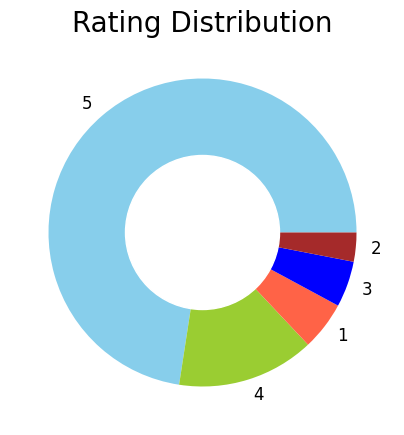

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Load the data
data = pd.read_csv("Amazon.txt", delimiter='\t')

# Display the first five rows of the data
print(data.head())

# Plot the pie chart of rating distribution
ratings = data["rating"].value_counts()
custom_colors = ["skyblue", "yellowgreen", 'tomato', "blue", "brown"]
plt.figure(figsize=(5, 5))
plt.pie(ratings.values, labels=ratings.index, colors=custom_colors)
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.title("Rating Distribution", fontsize=20)
plt.show()




In [18]:
# Perform sentiment analysis of the reviews
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["verified_reviews"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["verified_reviews"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["verified_reviews"]]


In [19]:
# Compute the total positive, negative, and neutral sentiments
total_positive = sum(data["Positive"])
total_negative = sum(data["Negative"])
total_neutral = sum(data["Neutral"])

# Print the results
print("Total Positive Sentiment: ", total_positive)
print("Total Negative Sentiment: ", total_negative)
print("Total Neutral Sentiment: ", total_neutral)

Total Positive Sentiment:  1035.4579999999983
Total Negative Sentiment:  96.79999999999995
Total Neutral Sentiment:  1936.740999999996


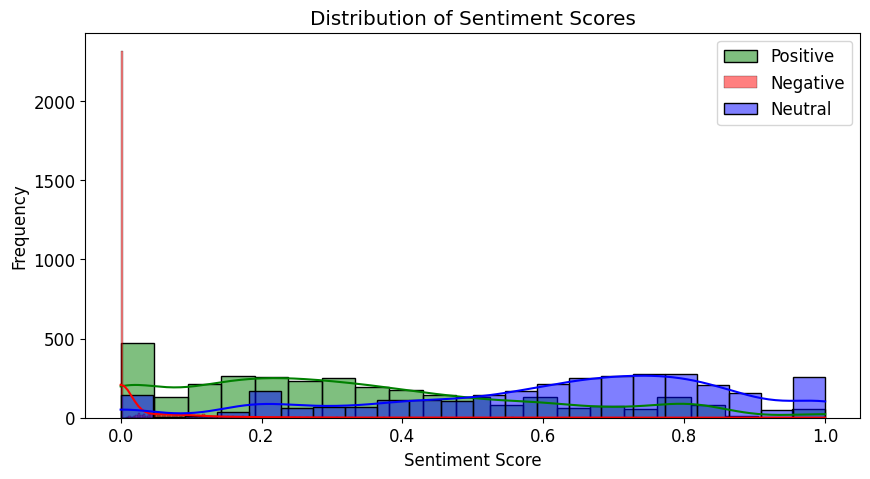

In [20]:
plt.figure(figsize=(10,5))
sns.histplot(data=data, x="Positive", color="green", label="Positive", kde=True)
sns.histplot(data=data, x="Negative", color="red", label="Negative", kde=True)
sns.histplot(data=data, x="Neutral", color="blue", label="Neutral", kde=True)
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.title("Distribution of Sentiment Scores")
plt.legend()
plt.show()

In [21]:
average_sentiment = data.groupby("rating")[["Positive", "Negative", "Neutral"]].mean()

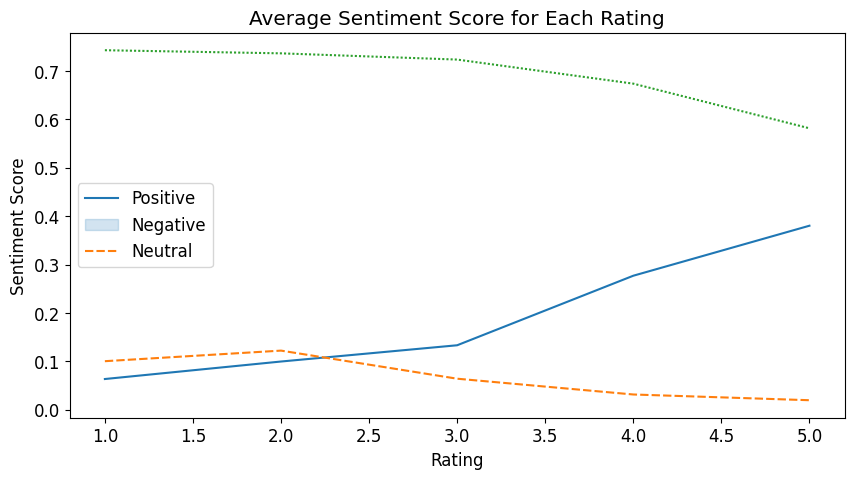

In [22]:
plt.figure(figsize=(10,5))
sns.lineplot(data=average_sentiment)
plt.xlabel("Rating")
plt.ylabel("Sentiment Score")
plt.title("Average Sentiment Score for Each Rating")
plt.legend(["Positive", "Negative", "Neutral"])
plt.show()

In [23]:
data.to_csv("Amazon_with_sentiments.csv", index=False)